# 🍯 US Honey Production Analysis  
### Exploratory Data Analysis (EDA) using Python

**Author:** Aryan  
**Domain:** Data Analytics / Data Science  
**Tools:** Python, Pandas, NumPy, Matplotlib, Seaborn  

---

### 📌 Problem Statement  
Agricultural production data contains valuable insights that often remain unexplored.  
This project analyzes **US honey production data** to identify **state-wise and year-wise trends**, helping understand production patterns and regional dominance.

### 🎯 Objectives
- Analyze honey production across U.S. states  
- Identify top honey-producing states  
- Study production trends over the years  
- Apply EDA and visualization techniques to extract insights


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('US_honey_dataset_updated.csv')

In [9]:
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


# Drop ---column named as unnamed:0
# Then we load the dataset with having the index as column =0

In [81]:
df.drop(columns=['Unnamed: 0'] , inplace=True)

In [15]:
df.head()

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [17]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

In [ ]:
# state 
*here it shows that honey refers to which state from where it belongs 
# colonies_number 
*it show that in the particular state how many colonies are there where honey is produced. 


# Data Cleaning

In [18]:
df.isnull().sum()

state                  0
colonies_number        0
yield_per_colony       0
production             0
stocks                 0
average_price          0
value_of_production    0
year                   0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [22]:
df.describe()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


In [25]:
df['year'].min()

1995

In [26]:
df['year'].max()

2021

In [28]:
df['production'] == df['colonies_number'] * df['yield_per_colony']

0        True
1        True
2        True
3        True
4        True
        ...  
1110    False
1111    False
1112    False
1113    False
1114    False
Length: 1115, dtype: bool

# Relationship between colonies number and production

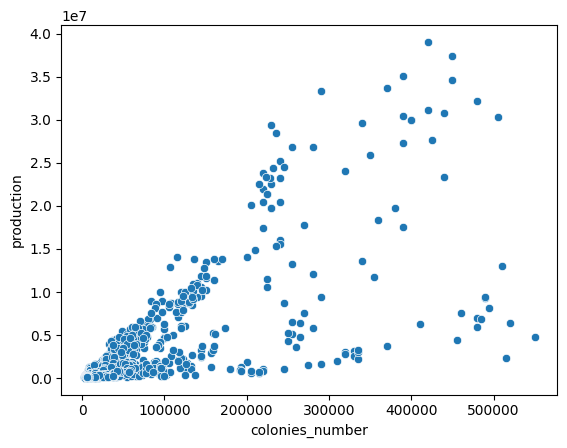

In [30]:
sns.scatterplot(x='colonies_number',y='production',data=df)
plt.show()

here as the colonies number increases production also increases

# Relationship between production and avg price

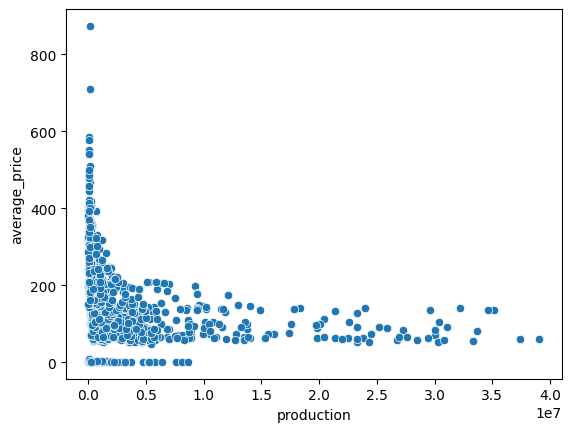

In [5]:
sns.scatterplot(x='production',y='average_price',data=df)
plt.show()

when the production is low the average price is high and vice-versa.

# Q. Which state has the highest honey production all out the three years. represent it using barplot?

In [8]:
df.groupby('state')['production'].sum().sort_values(ascending=True)

state
Maryland           1975000
Oklahoma           2055000
SouthCarolina      2823000
Kentucky           3224000
Maine              4762000
Virginia           5153000
WestVirginia       6411000
Tennessee          6857000
NewJersey          6913000
Vermont            7032000
Nevada             7399000
NorthCarolina      8909000
Indiana            9686000
Illinois           9864000
NewMexico         10082000
Kansas            14138000
Alabama           14467000
Hawaii            15420000
Missouri          17904000
Utah              20369000
Mississippi       21235000
Pennsylvania      21370000
Ohio              22485000
Colorado          32660000
Arizona           38844000
Oregon            43789000
Wyoming           43921000
Iowa              48607000
Arkansas          51846000
Washington        53238000
Georgia           57426000
Louisiana         60568000
Nebraska          63655000
NewYork           78444000
Idaho             87188000
Wisconsin         99909000
Michigan         10106

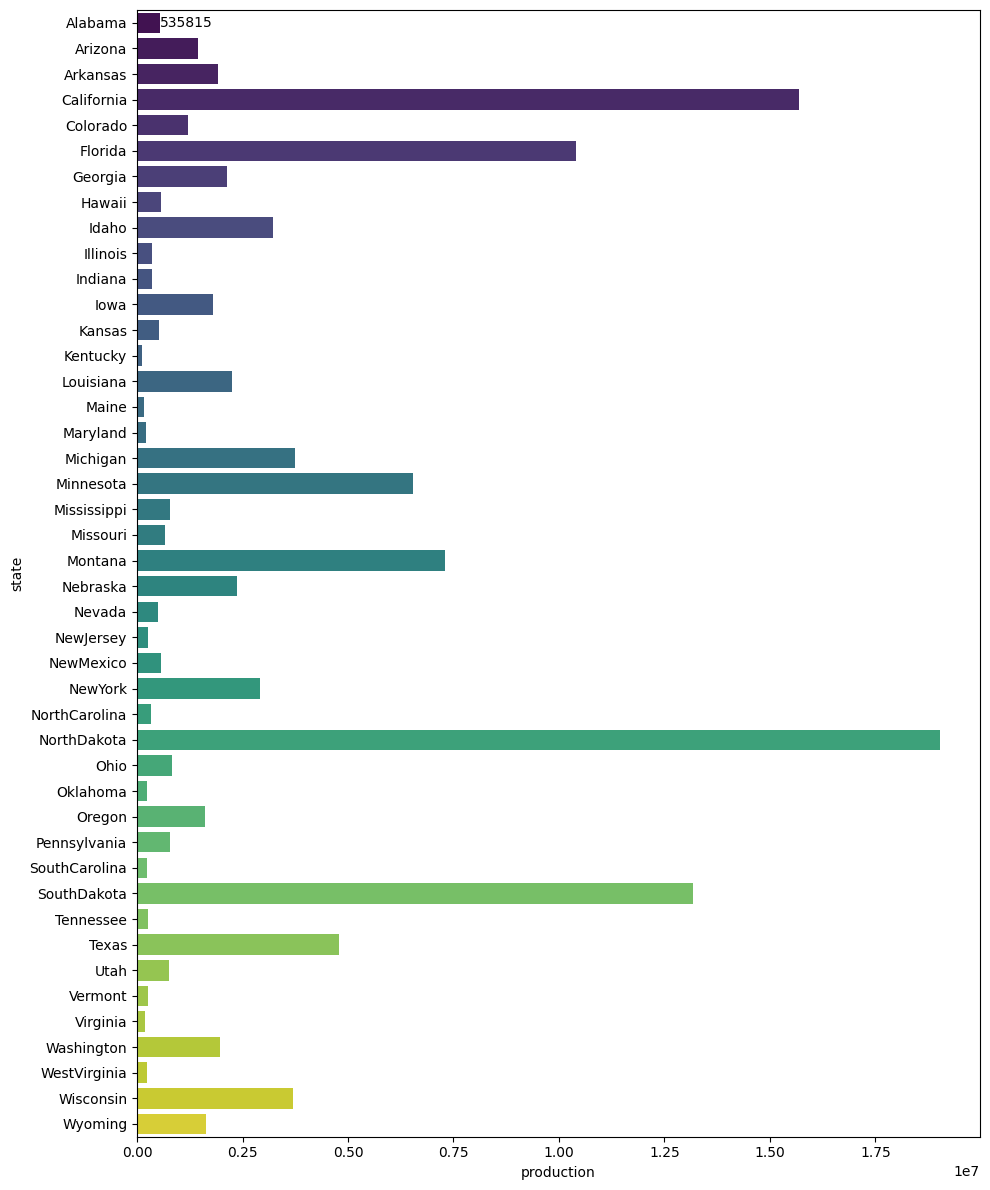

In [29]:
plt.figure(figsize=(10,12))
x=sns.barplot(y='state',x='production',data=df, errorbar=None,palette='viridis',hue='state')
x.bar_label(x.containers[0])
plt.tight_layout()
plt.show()

# Q. Which state is having the highest and the lowest yield per colony.use bar grap?

In [45]:
df1=pd.DataFrame(df.groupby('state')['yield_per_colony'].sum().sort_values(ascending=False))

In [35]:
df.groupby('state')['yield_per_colony'].sum().min()


377

In [36]:
df.groupby('state')['yield_per_colony'].sum().max()

2802

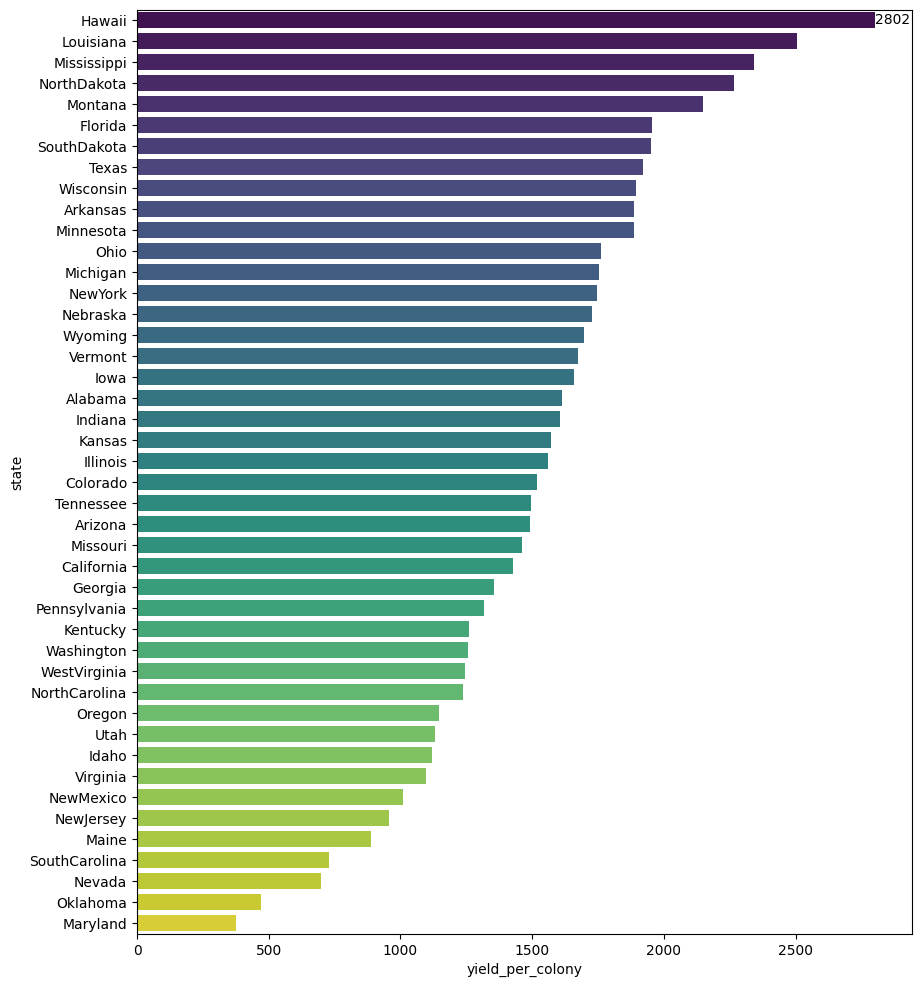

In [46]:
plt.figure(figsize=(10,12))
x1=sns.barplot(x='yield_per_colony',y='state',data=df1,errorbar=None, palette='viridis',hue='state')
x1.bar_label(x1.containers[0])
plt.show()


# Q. Which year witness the highest profit in the honey production?

In [47]:
profit=(df.groupby('year')['value_of_production'].sum().sort_values(ascending=False).reset_index())
profit

,year,value_of_production
0,2014,384483000
1,2016,335285000
2,2018,330766000
3,2017,326198000
4,2015,322505000
5,2013,315118000
6,2021,314413000
7,2019,303438000
8,2020,301831000
9,2012,280725000


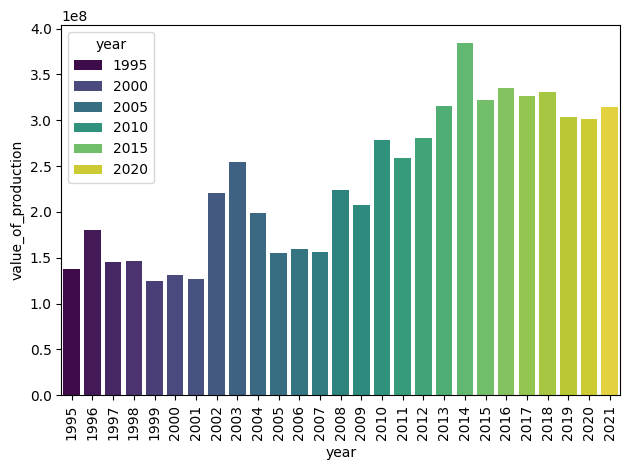

In [51]:
df2=sns.barplot(y='value_of_production',x='year',data=profit,errorbar=None,hue='year',palette='viridis')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Q. Which state has having the highest stock in 2020 . use barplot?

In [63]:
df_2022=df[df['year']==2021]
df_2022.sort_values(by='stocks',ascending=False)

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
1105,1105,SouthDakota,250000,49,5268000,5268000,2.27,27808000,2021
1100,1100,NorthDakota,515000,55,2266000,2266000,2.19,62032000,2021
1091,1091,Michigan,101000,51,1957000,1957000,2.97,15298000,2021
1095,1095,Montana,117000,57,1934000,1934000,2.17,14472000,2021
1078,1078,California,290000,33,1627000,1627000,2.40,22968000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1080,1080,Florida,193000,44,849000,849000,2.42,20551000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021
1102,1102,Oregon,86000,31,693000,693000,2.14,5705000,2021
1098,1098,NewYork,57000,53,665000,665000,4.15,12537000,2021


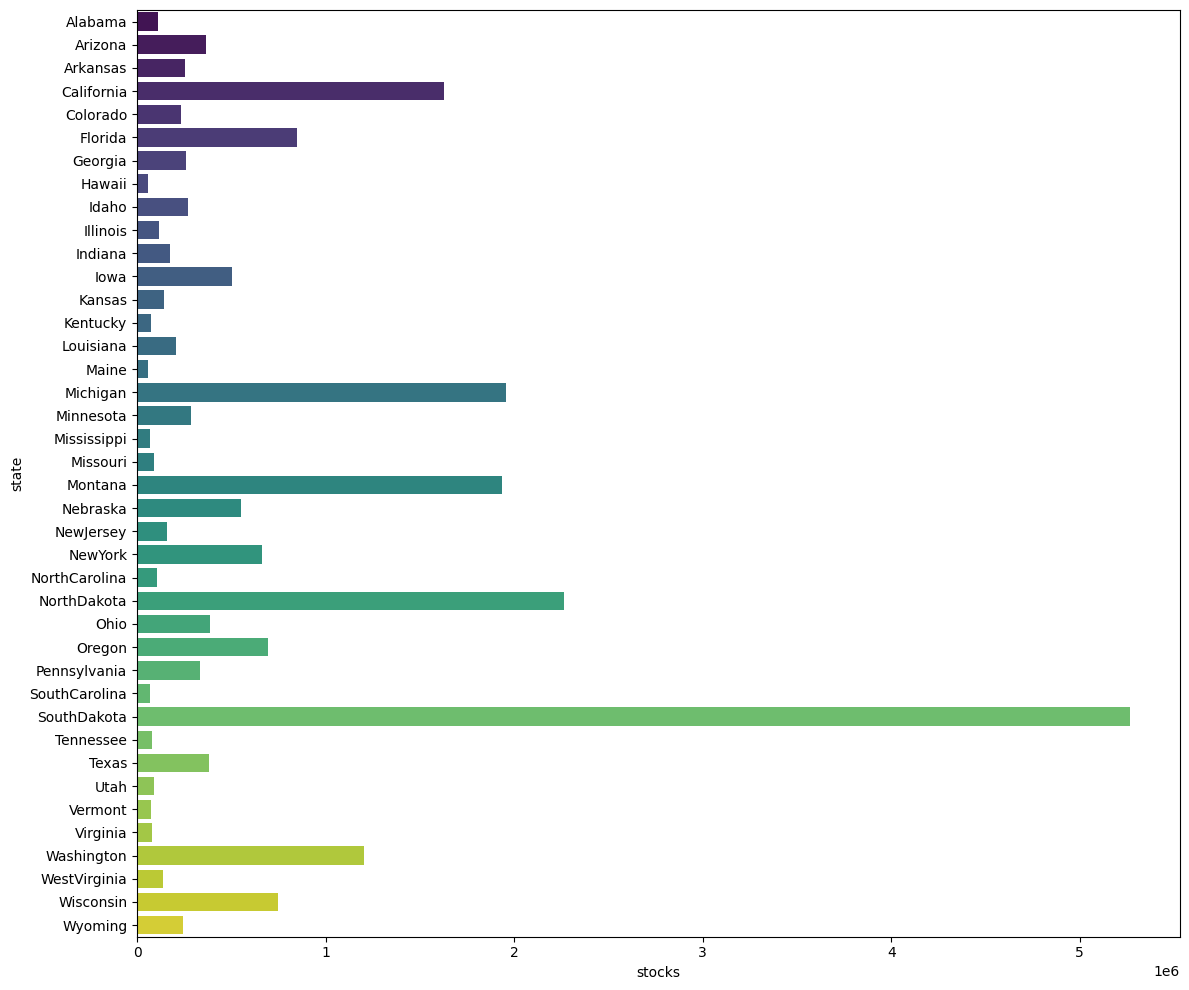

In [65]:
plt.figure(figsize=(12,10))
sns.barplot(data=df_2022,x='stocks',y='state' , palette='viridis', hue='state',errorbar=None)
plt.tight_layout()
plt.show()

# Q. Which state is having the highest average price in 21st century ?

In [66]:
df_21st=df[df['year']>2000]
df_21st.groupby('state')['average_price'].mean().sort_values(ascending=False)

state
Virginia         270.651905
Nevada           254.333333
Illinois         244.401429
NorthCarolina    228.152857
NewJersey        227.987619
Kentucky         223.672500
Tennessee        215.002857
WestVirginia     210.533333
Vermont          198.926667
Maine            198.514286
SouthCarolina    187.096000
Ohio             187.065714
Maryland         179.333333
Alabama          173.410000
Pennsylvania     172.896190
Indiana          172.245714
Missouri         166.798095
Kansas           163.830476
Oklahoma         161.333333
Hawaii           155.434762
NewYork          153.977143
NewMexico        143.583333
Wisconsin        140.898571
Iowa             137.321429
Michigan         136.236667
Georgia          134.651429
Washington       133.683810
Colorado         131.979048
Oregon           130.638095
Utah             123.298571
Florida          122.358095
California       122.240952
Nebraska         121.967143
Texas            121.749524
Arizona          121.703333
Montana       

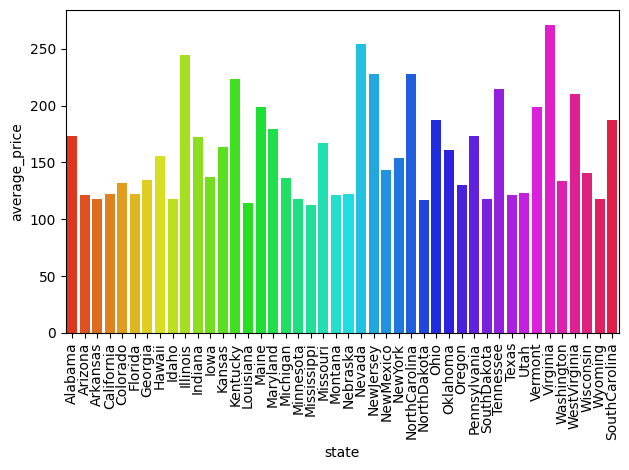

In [69]:
sns.barplot(data=df_21st , x='state',y='average_price',hue='state',palette='hsv',errorbar=None)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Q. Show the trend how the production changes for the state havali?

In [77]:
df_h=df[df['state']=='Hawaii']
df_h.groupby('year')['production'].sum().sort_values(ascending=False)

year
1997    1314000
1996    1240000
2005    1179000
1995    1032000
2002     952000
2009     950000
1998     944000
2006     930000
2007     920000
2008     900000
2003     791000
2000     784000
2004     768000
2001     696000
1999     640000
2012     263000
2011     246000
2010     239000
2014     140000
2016     127000
2020      79000
2015      71000
2013      65000
2021      56000
2019      51000
2017      25000
2018      18000
Name: production, dtype: int64

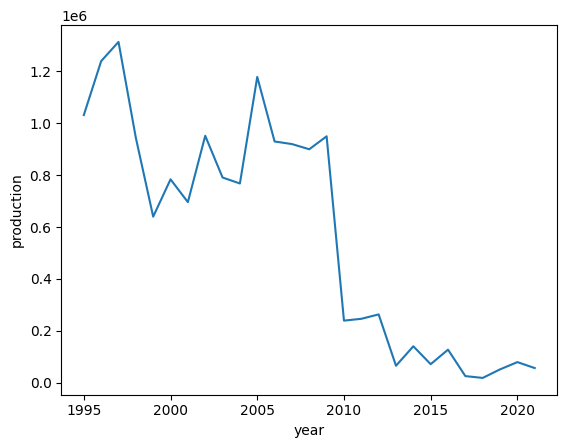

In [80]:
sns.lineplot(data=df_h,x='year',y='production',hue=None)
plt.show()

# Q. Compare the two highest profitable states of all time and how was their change in yield per colony ?

In [82]:
df.groupby('state')['value_of_production'].sum().sort_values(ascending=False)


state
NorthDakota      1186219000
California        653982000
SouthDakota       619095000
Florida           509670000
Montana           406563000
Minnesota         310462000
Texas             284720000
Michigan          217841000
NewYork           177921000
Wisconsin         176442000
Georgia           145945000
Idaho             139536000
Louisiana         129601000
Washington        119823000
Nebraska          106998000
Oregon            102109000
Iowa               87563000
Wyoming            87502000
Arkansas           73781000
Colorado           63844000
Arizona            59772000
Ohio               59637000
Mississippi        59265000
Pennsylvania       55153000
Hawaii             49888000
Utah               40157000
NorthCarolina      38645000
Illinois           36782000
Missouri           32372000
Alabama            28668000
NewJersey          28201000
Kansas             27970000
Tennessee          27276000
SouthCarolina      26218000
Indiana            24658000
Virginia      

In [87]:
df_5=df[(df['state']=='NorthDakota') | (df['state']=='California')]
df_5

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
3,California,420000,93,39060000,4687000,60.00,23436000,1995
28,NorthDakota,220000,108,23760000,3802000,63.00,14969000,1995
47,California,390000,70,27300000,4641000,84.00,22932000,1996
72,NorthDakota,230000,86,19780000,4945000,90.00,17802000,1996
91,California,400000,75,30000000,9000000,70.00,21000000,1997
116,NorthDakota,245000,100,24500000,7350000,74.00,18130000,1997
134,California,450000,83,37350000,12326000,62.00,23157000,1998
159,NorthDakota,230000,128,29440000,8832000,63.00,18547000,1998
177,California,505000,60,30300000,10302000,53.00,16059000,1999
202,NorthDakota,255000,105,26775000,8836000,59.00,15797000,1999


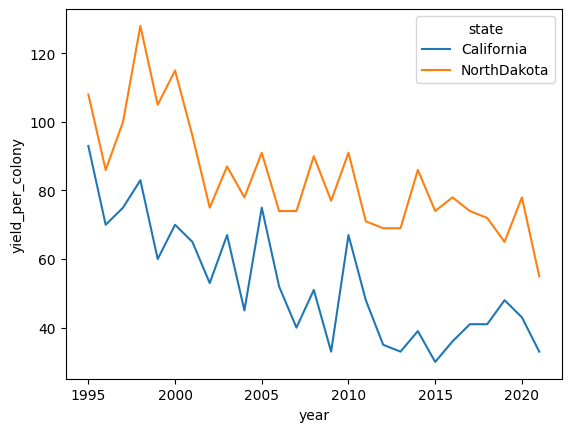

In [88]:
sns.lineplot(data=df_5,x='year',y='yield_per_colony',hue='state')
plt.show()

## 💡 Key Insights

- Honey production is **highly concentrated** in a few U.S. states  
- Certain states consistently dominate national production  
- Production levels fluctuate over the years, possibly due to environmental and economic factors  


## ✅ Conclusion

This project demonstrates how exploratory data analysis can transform raw agricultural data into meaningful insights.  
It strengthened my skills in **data cleaning, visualization, and analytical thinking**, bringing me one step closer to a professional data role.
